# Processamento de Áudio com Python

In [1]:
# imports
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

import scipy.io.wavfile as wavf

import DSP

In [2]:
""" tonegen
@brief: Gera um tom

@vars
freq:   Frequência do tom
lenght: Duração do tom em segundos
ampli:  Amplitude do tom
fs:     Frequência de Amostragem
"""
def tonegen(freq, lenght, ampli, fs):
    fd = (2*np.pi*freq)/fs # Frequência digital do sinal
    n  = np.arange(0, np.ceil(fs*lenght)) # vai de 0 à 'lenght'
    ###
    tone = ampli*np.sin(fd*n)
    return [tone, n]

""" DTMF Generator
@brief:    Classe que gera tom no padrão DTMF

@vars
tone_lenght:    Duração do tom de cada dígito
digit_spacing:  Intervalo entre cada dígito em segundos
amplitude:      Amplitude do sinal
sampling_freq:  Frequência de amostragem
T:              Período de Amostragem
"""
class DTMF_Generator:
    def __init__(self, tone_lenght, digit_spacing, amplitude, sampling_freq):
        self.tone_lenght    = tone_lenght
        self.digit_spacing  = digit_spacing
        self.amplitude      = amplitude
        self.sampling_freq  = sampling_freq
        self.T              = 1/sampling_freq
    # Gera delay entre os dígitos
    def get_delay(self):
        delay   = np.zeros(int(np.ceil(self.digit_spacing*self.sampling_freq)))
        return delay
    # Gera tom (Copiado de tonegen)
    def tonegen(self, freq):
        fd = (2*np.pi*freq)*self.T # Frequência digital do sinal
        n  = np.arange(0, np.ceil(self.sampling_freq*self.tone_lenght)) # vai de 0 à 'lenght'
        ###
        tone = self.amplitude*np.sin(fd*n)
        return tone
    # Gera tom do dígito
    def get_tone(self, digit):
        dig_tone    = self.tonegen(tone_f1[digit]) + self.tonegen(tone_f2[digit])
        return dig_tone
    # Concatenta um sinal e o exporta (Se especificado)
    # digit_seq é a sequencia de dígitos (array de str)
    def generate_dtmf(self, digit_seq, filename=None):
        dtmf = self.get_delay()
        for digit in digit_seq:
            dtmf = np.append(dtmf, self.get_tone(digit))
            dtmf = np.append(dtmf, self.get_delay())
        if (filename):
            wavf.write(filename, int(self.sampling_freq), dtmf)
        n = np.arange(0, len(dtmf))

        return [dtmf, n]

tone_f1 = {
    '1': 1209,
    '2': 1336,
    '3': 1477,
    'A': 1632,
    '4': 1209,
    '5': 1336,
    '6': 1477,
    'B': 1632,
    '7': 1209,
    '8': 1336,
    '9': 1477,
    'C': 1632,
    '*': 1209,
    '0': 1336,
    '#': 1477,
    'D': 1632,
}

tone_f2 = {
    '1': 697,
    '2': 697,
    '3': 697,
    'A': 697,
    '4': 770,
    '5': 770,
    '6': 770,
    'B': 770,
    '7': 852,
    '8': 852,
    '9': 852,
    'C': 852,
    '*': 941,
    '0': 941,
    '#': 941,
    'D': 941,
}


In [3]:
dtmf_gen = DTMF_Generator(40e-3, 0.1, 0.7, 8e3)
dtmf_seq = dtmf_gen.generate_dtmf(['9', '8', '1', 'A'], "Sinais/dtmf.wav")

In [4]:
[tone_220, n] = tonegen(220, 5, 0.6, 1e3)
DSP.write_wav("Sinais/tom_220.wav", 1000, tone_220)
half_tone_220 = DSP.halfsp(tone_220)
DSP.write_wav("Sinais/half_tom_220.wav", 1000, half_tone_220)
double_tone_220 = DSP.doublesp(tone_220)
DSP.write_wav("Sinais/double_tom_220.wav", 1000, double_tone_220)

Resultado em frequência: 'halfsp' parece dobrar a frequência e 'doublesp' claramente adiciona mais uma frequência que parece ter metade do valor da original.

Resultado no tempo, olhando para o resultado de 'halfsp' podemos ver que parece ter um "batimento" e a onda está levemente distorcida. Já o resultado de 'doublesp' distorce o sinal moderadamente, podemos observar que cada sequência de três pontos forma uma linha reta e podemos ouvir um segundo tom distinto com frequência mais baixa que o original.

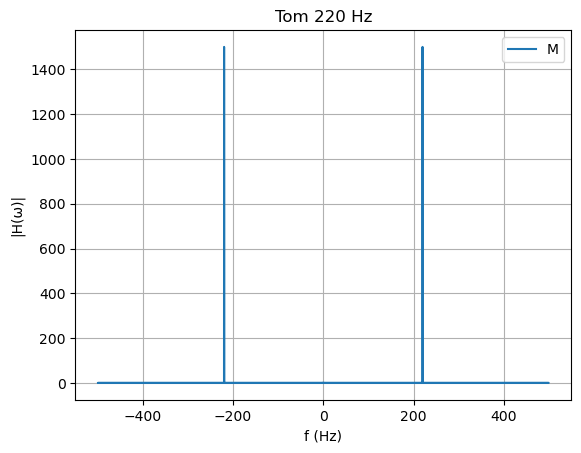

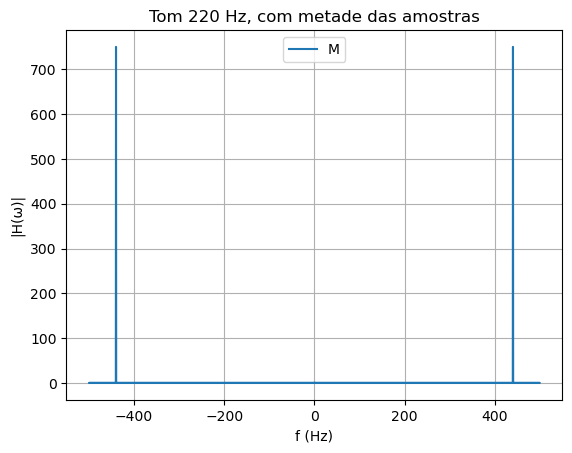

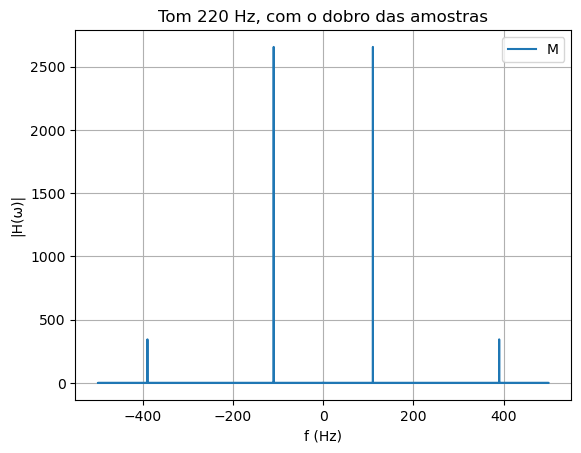

In [5]:
H_tone_220          = np.fft.fft(tone_220)
H_half_tone_220     = np.fft.fft(half_tone_220)
H_double_tone_220   = np.fft.fft(double_tone_220)

w           = np.fft.fftfreq(len(tone_220), 1e-3)
w_half      = np.fft.fftfreq(len(half_tone_220), 1e-3)
w_double    = np.fft.fftfreq(len(double_tone_220), 1e-3)

DSP.Plot_Fourier([H_tone_220, w], title = "Tom 220 Hz")
DSP.Plot_Fourier([H_half_tone_220, w_half], title = "Tom 220 Hz, com metade das amostras")
DSP.Plot_Fourier([H_double_tone_220, w_double], title = "Tom 220 Hz, com o dobro das amostras")

In [6]:
[fs, raw_voice]     = DSP.read_wav("Sinais/Frase_Teste.wav")
raw_voice           = DSP.normalize(raw_voice)

half_voice          = DSP.halfsp(raw_voice)
double_voice        = DSP.doublesp(raw_voice)
raw_voice2d         = np.array([raw_voice, raw_voice])  # Convert to stereo
fliplr_voice        = np.fliplr(raw_voice2d)
flipud_voice        = np.flipud(raw_voice2d)

DSP.write_wav("Sinais/half_voice.wav", fs, half_voice)
DSP.write_wav("Sinais/double_voice.wav", fs, double_voice)
DSP.write_wav("Sinais/fliplr_voice.wav", fs, fliplr_voice[0, :])    # Convert back to mono
DSP.write_wav("Sinais/flipud_voice.wav", fs, flipud_voice[0, :])    # Convert back to mono

## Resultados - Processamento de Voz

### half
Dobrou frequência da voz, parecido com dobrar a velocidade de reprodução

### double
Há uma distorção forte na voz, tornando difícil o discernimento das palavrase a mesma separação em frequência vista com o tom de frequência única.

### fliplr
Simplesmente toca o áudio de trás para frente

### flipud
Simplesmente troca os canais de áudio, tocando o aúdio do canal esquerdo no canal direito e vice versa.

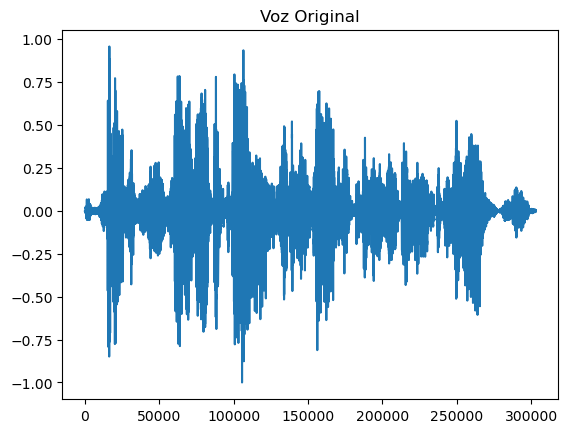

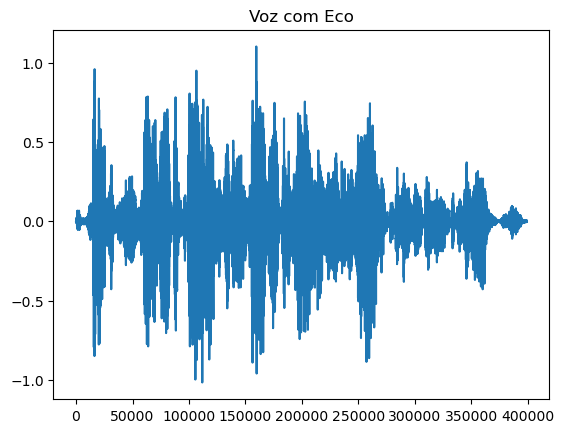

In [7]:
voice_echo = DSP.echo(raw_voice, 1/np.sqrt(2), 1, fs)

DSP.write_wav("Sinais/voz com eco.wav", fs, voice_echo)
plt.plot(raw_voice)
plt.title("Voz Original")
plt.show()
plt.plot(voice_echo)
plt.title("Voz com Eco")
plt.show()

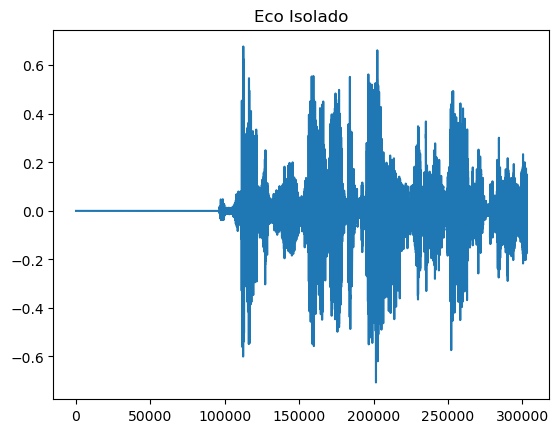

In [8]:
pure_echo = voice_echo.copy()
pure_echo = voice_echo[0:len(raw_voice)] - raw_voice
plt.plot(pure_echo)
plt.title("Eco Isolado")
plt.show()

O sinal de eco não apresenta um comportamento muito interessante, parecendo apenas que outra pessoa começa a falar depois de 1 segundo.

In [9]:
[fs, tunnel_IR]     = DSP.read_wav("Sinais/middle_tunnel_4way_mono.wav")
[fs, room_IR]       = DSP.read_wav("Sinais/Resposta_ao_impulso_quarto.wav")

raw_voice = raw_voice[0:len(raw_voice)//4] # Se não reduzir tamanho, demora demais

In [10]:
# Normalizando Sinais
tunnel_IR_norm      = tunnel_IR.astype(float)/np.max(np.abs(tunnel_IR.astype(float)))
raw_voice_norm      = raw_voice.astype(float)/np.max(np.abs(raw_voice.astype(float)))
room_IR_norm        = room_IR.astype(float)/np.max(np.abs(room_IR.astype(float)))

In [11]:
voice_in_tunnel = np.convolve(raw_voice_norm, tunnel_IR_norm)
voice_in_tunnel = voice_in_tunnel/np.max(np.abs(voice_in_tunnel))
DSP.write_wav("Sinais/Voz no tunel.wav", 96000, voice_in_tunnel)

## Teste de tempo com vários tempos de resposta

In [12]:
len_IR = len(tunnel_IR_norm)

In [13]:
%%time
np.convolve(raw_voice_norm, tunnel_IR_norm)

CPU times: total: 20.4 s
Wall time: 14 s


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -7.27564599e-05, -5.13157016e-05, -2.18143599e-05])

In [14]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//2], raw_voice_norm)

CPU times: total: 9.64 s
Wall time: 6.6 s


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.12951416e-04, -7.56613948e-05, -3.46166097e-05])

In [15]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//3], raw_voice_norm)

CPU times: total: 6.55 s
Wall time: 5.14 s


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -3.01767570e-05, -2.41274488e-05, -1.84453468e-05])

In [16]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//4], raw_voice_norm)

CPU times: total: 4.75 s
Wall time: 3.14 s


array([ 0.        ,  0.        ,  0.        , ..., -0.00078819,
       -0.00049669, -0.00022808])

In [17]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//5], raw_voice_norm)

CPU times: total: 3.52 s
Wall time: 2.39 s


array([ 0.        ,  0.        ,  0.        , ..., -0.00067862,
       -0.00040968, -0.00018243])

In [18]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//10], raw_voice_norm)

CPU times: total: 1.95 s
Wall time: 1.64 s


array([0.        , 0.        , 0.        , ..., 0.0058591 , 0.00338959,
       0.00142522])

In [19]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//20], raw_voice_norm)

CPU times: total: 1.05 s
Wall time: 718 ms


array([ 0.        ,  0.        ,  0.        , ..., -0.00929593,
       -0.00774121, -0.00440928])

In [20]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//40], raw_voice_norm)

CPU times: total: 500 ms
Wall time: 639 ms


array([ 0.        ,  0.        ,  0.        , ..., -0.06013475,
       -0.03731322, -0.01708865])

In [21]:
%%time
np.convolve(tunnel_IR_norm[0:len_IR//80], raw_voice_norm)

CPU times: total: 328 ms
Wall time: 290 ms


array([0.        , 0.        , 0.        , ..., 0.0728305 , 0.05501443,
       0.03104238])

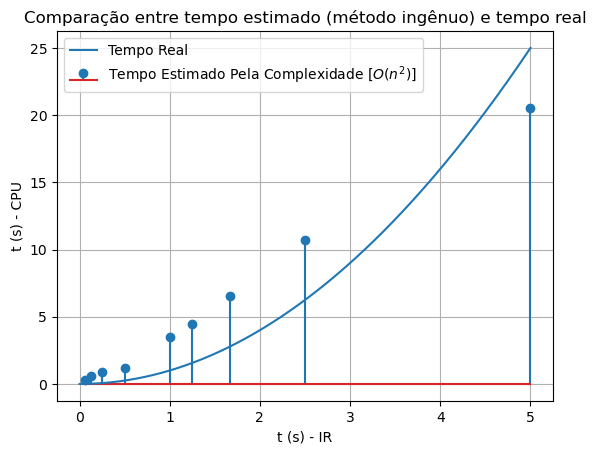

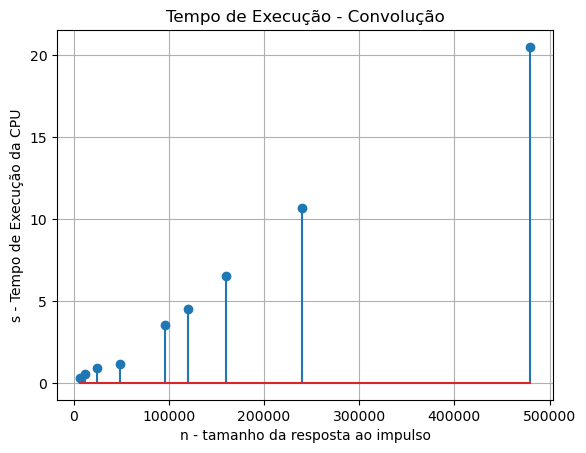

In [28]:
time_cpu = [20.5, 10.7, 6.55, 4.48, 3.52, 1.18, 906e-3, 562e-3, 328e-3]
len_IRax = [len_IR, len_IR//2, len_IR//3, len_IR//4, len_IR//5, len_IR//10, len_IR//20, len_IR//40, len_IR//80]

t = np.linspace(0, len_IR/fs, 1000)
plt.stem(np.array(len_IRax)/fs, time_cpu)
plt.plot(t, t**2)
plt.legend(["Tempo Real", "Tempo Estimado Pela Complexidade [$O(n^2)$]"])
plt.grid(True, which='both', axis='both')
plt.title("Comparação entre tempo estimado (método ingênuo) e tempo real")
plt.xlabel("t (s) - IR")
plt.ylabel("t (s) - CPU")
plt.show()

DSP.plot([time_cpu, len_IRax], title="Tempo de Execução - Convolução",
         xl="n - tamanho da resposta ao impulso", yl="s - Tempo de Execução da CPU")

## Observações - tempo de convolução

Podemos observar que a convolução é um processo longo, o uso de pontos flutuantes provavelmente piora o tempo de processamento mas não é o único fator na má performance. Também podemos observar que o tempo de execução escala conforme esperado pela complexidade computacional da convolução, mas deve-se notar que esta é a complexidade para o pior caso e o fator limitante é o sinal de voz sendo convoluido, já que este possui tamanho constante.